In [1]:
import os
import random
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn import metrics
from scipy.stats import spearmanr
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon
import itertools
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Define File Paths

In [9]:
MEASURES_FILE = "MdRQA_measures.csv"
SHUFF_MEASURES_FILE = "shuff_MdRQA_measures.csv"
LABELS_FILE = "team_block_outcomes.csv"
RESULTS = "results/"

LEVELS_MEASURES_FILE = "60s_MdRQA_measures.csv"
LEVELS_SHUFF_MEASURES_FILE = "60s_shuff_MdRQA_measures.csv"



# Load Data

In [11]:
dfMeasures = pd.read_csv(MEASURES_FILE)
dfShuffMeasures = pd.read_csv(SHUFF_MEASURES_FILE)
dfLabels = pd.read_csv(LABELS_FILE)

print("%s shape: %s" % (MEASURES_FILE, dfMeasures.shape))
print("%s shape: %s" % (SHUFF_MEASURES_FILE, dfShuffMeasures.shape))
print("%s shape: %s" % (LABELS_FILE, dfLabels.shape))


dfLevelsMeasures = pd.read_csv(LEVELS_MEASURES_FILE)
dfLevelsShuffMeasures = pd.read_csv(LEVELS_SHUFF_MEASURES_FILE)
print("\n")
print("%s shape: %s" % (LEVELS_MEASURES_FILE, dfLevelsMeasures.shape))
print("%s shape: %s" % (LEVELS_SHUFF_MEASURES_FILE, dfLevelsShuffMeasures.shape))


MdRQA_measures.csv shape: (271, 11)
shuff_MdRQA_measures.csv shape: (271, 11)
team_block_outcomes.csv shape: (274, 7)


60s_MdRQA_measures.csv shape: (765, 12)
60s_shuff_MdRQA_measures.csv shape: (765, 12)


# Comparing means of each MdRQA measure for the shuffled vs. non shuffled cases (paired-samples t-test at the team level)

In [27]:
# Resource: https://www.marsja.se/how-to-use-python-to-perform-a-paired-sample-t-test/
from scipy.stats import ttest_rel

# Align pairs of shuffled and non-shuffled features (non-shuffled = "_x", shuffled = "_y")
df = pd.merge(dfMeasures, dfShuffMeasures, on=['GROUPID', 'block'], how='inner')
# Average at team-level
dfTeamLevelMeasures = df.groupby("GROUPID").agg(np.nanmean)

dfWilcoxon = pd.DataFrame(columns=["measure", "stat", "p"])

features = ['REC', 'DET', 'ADL', 'MDL', 'DENTR', 'LAM', 'AVL', 'MVL', 'VENTR']
for feat in features[1:]:
    print("\nNon-Parametric paired samples t-test for ", feat)
    
    x = dfTeamLevelMeasures.loc[:, feat + "_x"]
    y = dfTeamLevelMeasures.loc[:, feat + "_y"]

    # Non-parametrics paired samples t-test
    (stat, p) =  wilcoxon(x, y) #, zero_method="zsplit") 
    print("\t %12s: %.4f" % ("Statistic", stat))
    print("\t %12s: %.4f" % ("p-value", p))
    
    dfWilcoxon = pd.concat([dfWilcoxon, pd.DataFrame({"measure": [feat], "stat": [stat], "p": [p]})], ignore_index=True)

display(dfWilcoxon)



Non-Parametric paired samples t-test for  DET
	    Statistic: 0.0000
	      p-value: 0.0000

Non-Parametric paired samples t-test for  ADL
	    Statistic: 0.0000
	      p-value: 0.0000

Non-Parametric paired samples t-test for  MDL
	    Statistic: 0.0000
	      p-value: 0.0000

Non-Parametric paired samples t-test for  DENTR
	    Statistic: 0.0000
	      p-value: 0.0000

Non-Parametric paired samples t-test for  LAM
	    Statistic: 0.0000
	      p-value: 0.0000

Non-Parametric paired samples t-test for  AVL
	    Statistic: 0.0000
	      p-value: 0.0000

Non-Parametric paired samples t-test for  MVL
	    Statistic: 0.0000
	      p-value: 0.0000

Non-Parametric paired samples t-test for  VENTR
	    Statistic: 0.0000
	      p-value: 0.0000


,measure,stat,p
0,DET,0.0,0.0
1,ADL,0.0,0.0
2,MDL,0.0,0.0
3,DENTR,0.0,0.0
4,LAM,0.0,0.0
5,AVL,0.0,0.0
6,MVL,0.0,0.0
7,VENTR,0.0,0.0


# Level-level Feature Distributions 

In [16]:
# Align pairs of shuffled and non-shuffled features (non-shuffled = "_x", shuffled = "_y")
dfLevelsFeatures = pd.merge(dfLevelsMeasures, dfLevelsShuffMeasures, on=['UniqueID'], how='inner')

features = ['REC', 'DET', 'ADL', 'MDL', 'DENTR', 'LAM', 'AVL', 'MVL', 'VENTR']

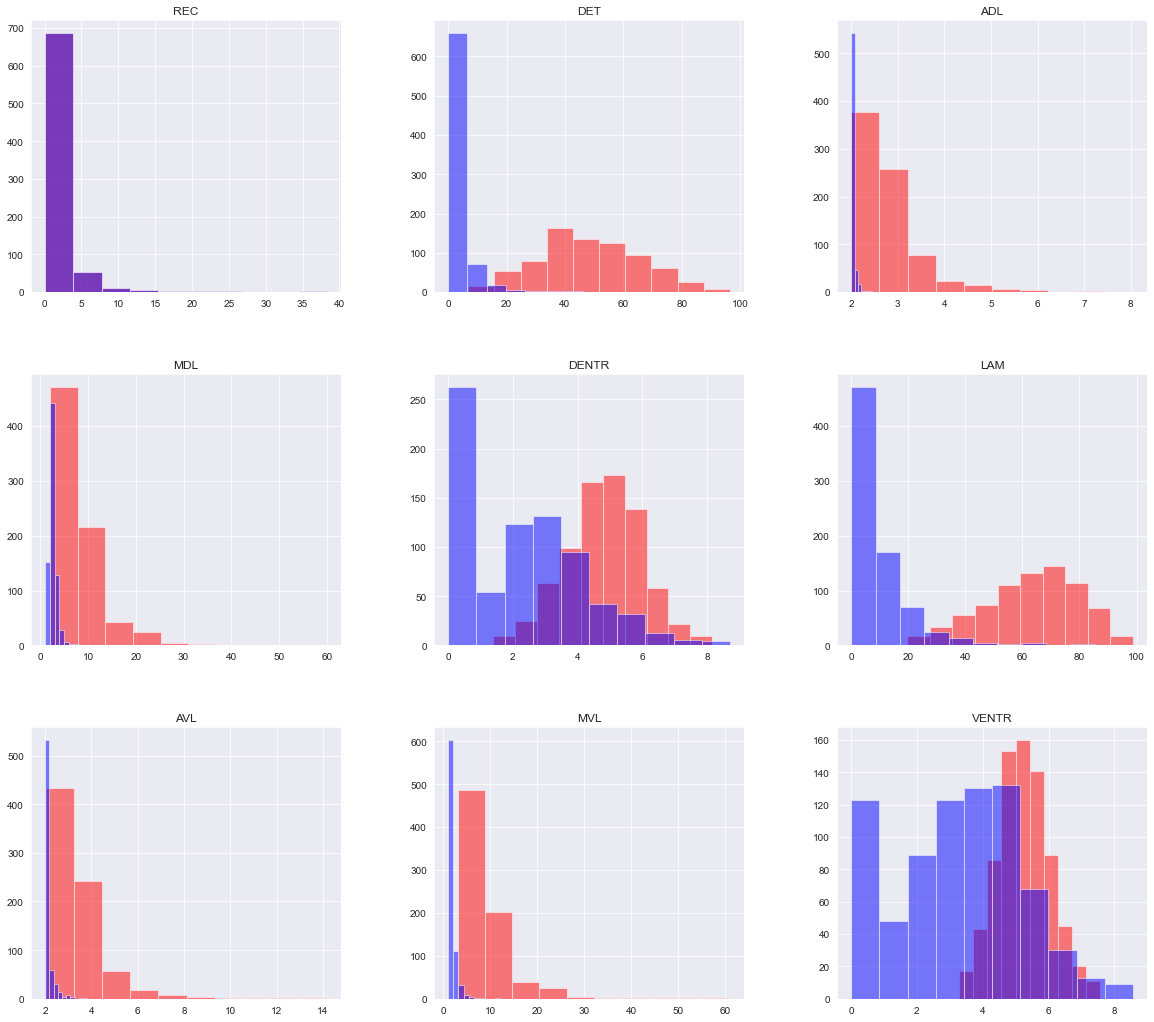

In [25]:

fig, ax = plt.subplots(3, 3, figsize=(20, 18))

for i,feat in enumerate(features):
    if i == 0:
        axis = ax[0, 0]
    elif i == 1:
        axis = ax[0, 1]
    elif i == 2:
        axis = ax[0, 2]
    elif i == 3:
        axis = ax[1, 0]
    elif i == 4:
        axis = ax[1, 1]
    elif i == 5:
        axis = ax[1, 2]
    elif i == 6:
        axis = ax[2, 0]
    elif i == 7:
        axis = ax[2, 1]
    elif i == 8:
        axis = ax[2, 2]
        
    dfLevelsFeatures.hist(column=feat+"_x", ax=axis, alpha=0.5, color='red')
    dfLevelsFeatures.hist(column=feat+"_y", ax=axis, alpha=0.5, color='blue')
    axis.set_title(feat)
    
fig.savefig("level_level_feature_distributions.png")
 

# Block-level Feature Distributions

In [21]:
# Align pairs of shuffled and non-shuffled features (non-shuffled = "_x", shuffled = "_y")
dfBlockFeatures = pd.merge(dfMeasures, dfShuffMeasures, on=['GROUPID', 'block'], how='inner')

features = ['REC', 'DET', 'ADL', 'MDL', 'DENTR', 'LAM', 'AVL', 'MVL', 'VENTR']

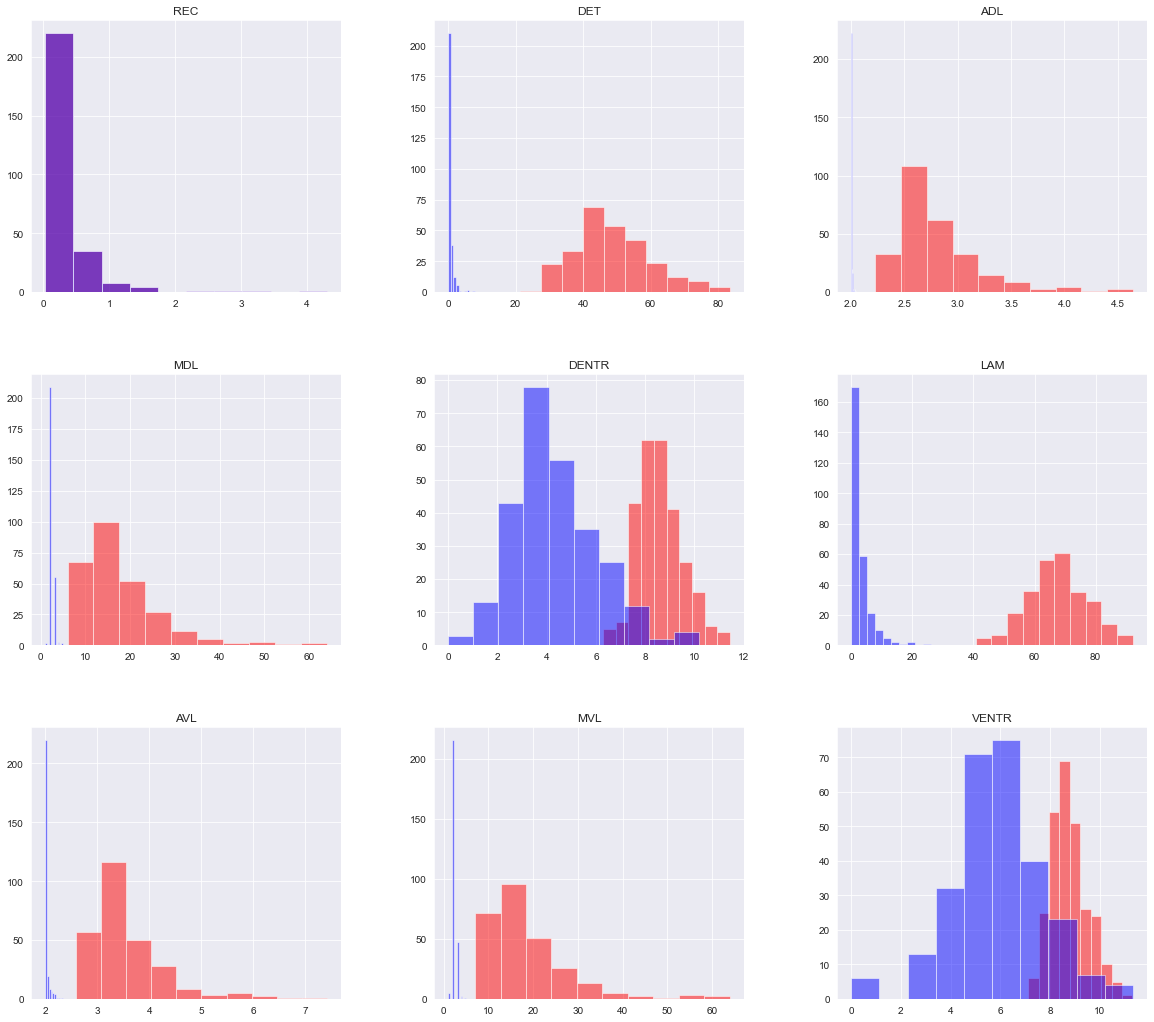

In [26]:

fig, ax = plt.subplots(3, 3, figsize=(20, 18))

for i,feat in enumerate(features):
    if i == 0:
        axis = ax[0, 0]
    elif i == 1:
        axis = ax[0, 1]
    elif i == 2:
        axis = ax[0, 2]
    elif i == 3:
        axis = ax[1, 0]
    elif i == 4:
        axis = ax[1, 1]
    elif i == 5:
        axis = ax[1, 2]
    elif i == 6:
        axis = ax[2, 0]
    elif i == 7:
        axis = ax[2, 1]
    elif i == 8:
        axis = ax[2, 2]
        
    dfBlockFeatures.hist(column=feat+"_x", ax=axis, alpha=0.5, color='red')
    dfBlockFeatures.hist(column=feat+"_y", ax=axis, alpha=0.5, color='blue')
    axis.set_title(feat)
    
fig.savefig("block_feature_distributions.png")
 

# T-test with synthetic data

	    Statistic: 10.6308
	      p-value: 0.0000

 Non-parametrics paired samples t-test:
	    Statistic: 298.5000
	      p-value: 0.0000


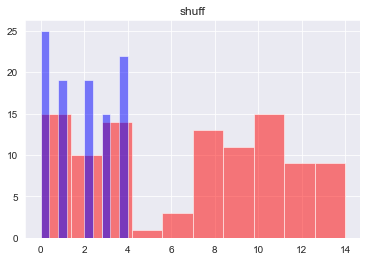

In [23]:
non_shuff = np.random.randint(low=0, high=15, size=100, dtype=int)
shuff = np.random.randint(low=0, high=5, size=100, dtype=int)

df = pd.DataFrame({"non_shuff": non_shuff, "shuff": shuff})
 
fig, ax = plt.subplots()
df.hist(column="non_shuff", alpha=0.5, color='red', ax=ax)
df.hist(column="shuff", alpha=0.5, color='blue', ax=ax)

x = df.loc[:, "non_shuff"]
y = df.loc[:, "shuff"]

# Paired samples t-test
(stat, p) =  ttest_rel(x, y) 
print("\t %12s: %.4f" % ("Statistic", stat))
print("\t %12s: %.4f" % ("p-value", p))

# Non-parametric paired samples t-test
(stat, p) =  wilcoxon(x, y) #, zero_method="zsplit") 
print("\n Non-parametrics paired samples t-test:")
print("\t %12s: %.4f" % ("Statistic", stat))
print("\t %12s: %.4f" % ("p-value", p))

	    Statistic: 26.1434
	      p-value: 0.0000

 Non-parametrics paired samples t-test:
	    Statistic: 0.0000
	      p-value: 0.0000


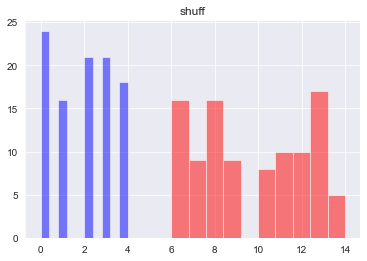

In [25]:
non_shuff = np.random.randint(low=6, high=15, size=100, dtype=int)
shuff = np.random.randint(low=0, high=5, size=100, dtype=int)

df = pd.DataFrame({"non_shuff": non_shuff, "shuff": shuff})
 
fig, ax = plt.subplots()
df.hist(column="non_shuff", alpha=0.5, color='red', ax=ax)
df.hist(column="shuff", alpha=0.5, color='blue', ax=ax)

x = df.loc[:, "non_shuff"]
y = df.loc[:, "shuff"]

# Paired samples t-test
(stat, p) =  ttest_rel(x, y) 
print("\t %12s: %.4f" % ("Statistic", stat))
print("\t %12s: %.4f" % ("p-value", p))

# Non-parametric paired samples t-test
(stat, p) =  wilcoxon(x, y) #, zero_method="zsplit") 
print("\n Non-parametrics paired samples t-test:")
print("\t %12s: %.4f" % ("Statistic", stat))
print("\t %12s: %.4f" % ("p-value", p))

	    Statistic: 18.8909
	      p-value: 0.0000

 Non-parametrics paired samples t-test:
	    Statistic: 0.0000
	      p-value: 0.0000


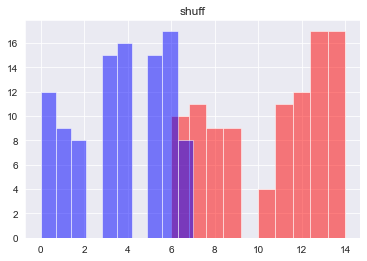

In [20]:
non_shuff = np.random.randint(low=6, high=15, size=100, dtype=int)
shuff = np.random.randint(low=0, high=8, size=100, dtype=int)

df = pd.DataFrame({"non_shuff": non_shuff, "shuff": shuff})
 
fig, ax = plt.subplots()
df.hist(column="non_shuff", alpha=0.5, color='red', ax=ax)
df.hist(column="shuff", alpha=0.5, color='blue', ax=ax)

x = df.loc[:, "non_shuff"]
y = df.loc[:, "shuff"]

# Paired samples t-test
(stat, p) =  ttest_rel(x, y) #wilcoxon(x, y) #, zero_method="zsplit") 
print("\t %12s: %.4f" % ("Statistic", stat))
print("\t %12s: %.4f" % ("p-value", p))

# Non-parametric paired samples t-test
(stat, p) =  wilcoxon(x, y) #, zero_method="zsplit") 
print("\n Non-parametrics paired samples t-test:")
print("\t %12s: %.4f" % ("Statistic", stat))
print("\t %12s: %.4f" % ("p-value", p))

In [ ]:
non_shuff = np.random.randint(low=6, high=15, size=100, dtype=int)
shuff = np.random.randint(low=0, high=8, size=100, dtype=int)

df = pd.DataFrame({"non_shuff": non_shuff, "shuff": shuff})
 
fig, ax = plt.subplots()
df.hist(column="non_shuff", alpha=0.5, color='red', ax=ax)
df.hist(column="shuff", alpha=0.5, color='blue', ax=ax)

x = df.loc[:, "non_shuff"]
y = df.loc[:, "shuff"]

# Paired samples t-test
(stat, p) =  ttest_rel(x, y) #wilcoxon(x, y) #, zero_method="zsplit") 
print("\t %12s: %.4f" % ("Statistic", stat))
print("\t %12s: %.4f" % ("p-value", p))

# Non-parametric paired samples t-test
(stat, p) =  wilcoxon(x, y) #, zero_method="zsplit") 
print("\n Non-parametrics paired samples t-test:")
print("\t %12s: %.4f" % ("Statistic", stat))
print("\t %12s: %.4f" % ("p-value", p))

# Outcome Distribution

Text(0.5, 1.0, 'Normalized Task Score')

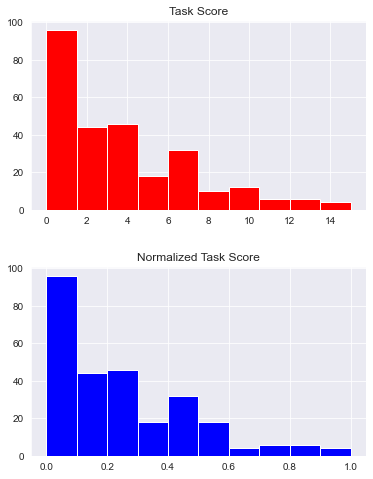

In [34]:
# Add on normalized task score
def min_max_scaling(series):
    # https://datagy.io/pandas-normalize-column/
    return (series - series.min()) / (series.max() - series.min())

dfLabels['norm_task_score'] = min_max_scaling(dfLabels['task_score'])


# Plot distributions
fig, ax = plt.subplots(2, figsize=(6, 8))

dfLabels.hist(column="task_score", ax=ax[0], alpha=1, color='red')
dfLabels.hist(column="norm_task_score", ax=ax[1], alpha=1, color='blue')
ax[0].set_title("Task Score")
ax[1].set_title("Normalized Task Score")


# Observed vs. Predicted

In [4]:
# Load median model data for RFR, LR, and SVR

## Task score not normalized
RESULTS = "/Users/angelina/Dropbox (Emotive Computing)/CPS_Gaze_Fixations/RQA/Collaborative-Problem-Solving/results/task_score/RAW/"
SHUFF_RESULTS = "/Users/angelina/Dropbox (Emotive Computing)/CPS_Gaze_Fixations/RQA/Collaborative-Problem-Solving/results/task_score/RAW_SHUFFLED/"

### RFR med = 16
med = "16"
dfRFR_ObsPred = pd.read_csv(RESULTS + "/RFR/RFR_TaskScore_True_vs_Pred_" + med + ".csv")

### LR med = 1
med = "1"
dfLR_ObsPred = pd.read_csv(RESULTS + "/LR/LR_TaskScore_True_vs_Pred_" + med + ".csv")

### SVR med = 18
med = "18"
dfSVR_ObsPred = pd.read_csv(RESULTS + "/SVR/SVR_TaskScore_True_vs_Pred_" + med + ".csv")



## Normalized task score
RESULTS = "/Users/angelina/Dropbox (Emotive Computing)/CPS_Gaze_Fixations/RQA/Collaborative-Problem-Solving/results/task_score_norm/RAW/"

### RFR med = 2
med = "2"
dfRFR_Norm_ObsPred = pd.read_csv(RESULTS + "/RFR/RFR_TaskScore_True_vs_Pred_" + med + ".csv")

### LR med = 1
med = "1"
dfLR_Norm_ObsPred = pd.read_csv(RESULTS + "/LR/LR_TaskScore_True_vs_Pred_" + med + ".csv")

### SVR med = 3
med = "3"
dfSVR_Norm_ObsPred = pd.read_csv(RESULTS + "/SVR/SVR_TaskScore_True_vs_Pred_" + med + ".csv")




## Line plot

<AxesSubplot:title={'center':'Random Forest: Observed vs. Predicted'}>

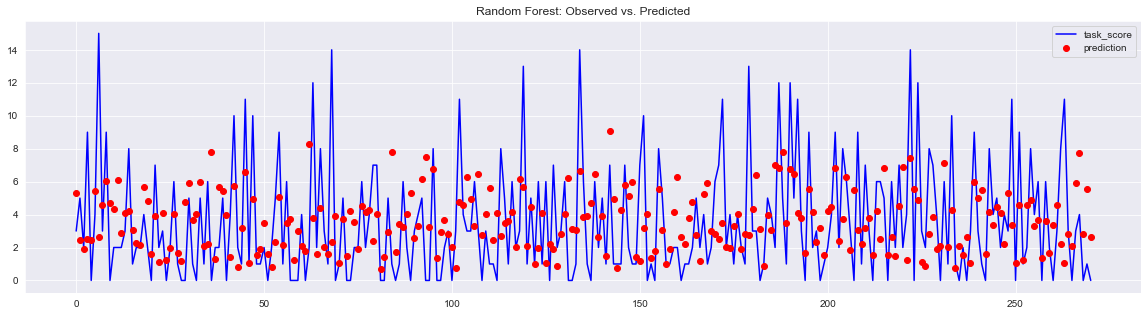

In [46]:
# Plot
dfRFR_ObsPred.plot(y=['task_score', 'prediction'], title='Random Forest: Observed vs. Predicted', \
                     style=['b-', 'ro'], figsize=(20, 5))

## Scatterplot

In [ ]:
 df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
...                    [6.4, 3.2, 1], [5.9, 3.0, 2]],
...                   columns=['length', 'width', 'species'])
>>> ax1 = df.plot.scatter(x='length',
...                       y='width',
...                       c='DarkBlue')



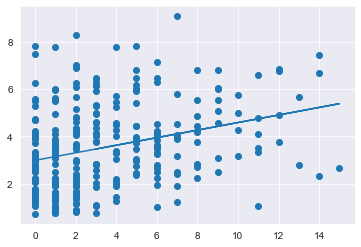

In [53]:
# https://whitlockschluter3e.zoology.ubc.ca/RExamples/Rcode_Chapter_17.html
x = dfRFR_ObsPred['task_score']
y = dfRFR_ObsPred['prediction']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)    

# Calculate Accuracy

In [13]:
# Load shuffled  median model data for RFR, LR, and SVR

## Task score not normalized
SHUFF_RESULTS = "/Users/angelina/Dropbox (Emotive Computing)/CPS_Gaze_Fixations/RQA/Collaborative-Problem-Solving/results/task_score/RAW_SHUFFLED"

### RFR med = 16
med = "9"
dfRFR_ObsPred_SHUFF = pd.read_csv(SHUFF_RESULTS + "/RFR/RFR_TaskScore_True_vs_Pred_SHUFF_" + med + ".csv")
dfRFR_ObsPred_SHUFF["prediction_rnd"] = np.round(dfRFR_ObsPred_SHUFF["prediction"])
RFR_acc = metrics.accuracy_score(dfRFR_ObsPred_SHUFF["task_score"], dfRFR_ObsPred_SHUFF["prediction_rnd"])
print("RFR acc: ", RFR_acc)


### LR med = 1
med = "19"
dfLR_ObsPred_SHUFF = pd.read_csv(SHUFF_RESULTS + "/LR/LR_TaskScore_True_vs_Pred_SHUFF_" + med + ".csv")
dfLR_ObsPred_SHUFF["prediction_rnd"] = np.round(dfLR_ObsPred_SHUFF["prediction"])
LR_acc = metrics.accuracy_score(dfLR_ObsPred_SHUFF["task_score"], dfLR_ObsPred_SHUFF["prediction_rnd"])
print("LR acc: ", LR_acc)

### SVR med = 18
med = "16"
dfSVR_ObsPred_SHUFF = pd.read_csv(SHUFF_RESULTS + "/SVR/SVR_TaskScore_True_vs_Pred_SHUFF_" + med + ".csv")
dfSVR_ObsPred_SHUFF["prediction_rnd"] = np.round(dfSVR_ObsPred_SHUFF["prediction"])
SVR_acc = metrics.accuracy_score(dfSVR_ObsPred_SHUFF["task_score"], dfSVR_ObsPred_SHUFF["prediction_rnd"])
print("SVR acc: ", SVR_acc)


RFR acc:  0.10943396226415095
LR acc:  0.1018867924528302
SVR acc:  0.1169811320754717


In [10]:
print("Non-shuffled accuracies")

dfRFR_ObsPred["prediction_rnd"] = np.round(dfRFR_ObsPred["prediction"])
dfRFR_ObsPred

RFR_acc = metrics.accuracy_score(dfRFR_ObsPred["task_score"], dfRFR_ObsPred["prediction_rnd"])
print("RFR acc: ", RFR_acc)


dfLR_ObsPred["prediction_rnd"] = np.round(dfLR_ObsPred["prediction"])
dfLR_ObsPred

LR_acc = metrics.accuracy_score(dfLR_ObsPred["task_score"], dfLR_ObsPred["prediction_rnd"])
print("LR acc: ", LR_acc)


dfSVR_ObsPred["prediction_rnd"] = np.round(dfSVR_ObsPred["prediction"])
dfSVR_ObsPred

SVR_acc = metrics.accuracy_score(dfSVR_ObsPred["task_score"], dfSVR_ObsPred["prediction_rnd"])
print("SVR acc: ", SVR_acc)



Non-shuffled accuracies
RFR acc:  0.11808118081180811
LR acc:  0.12915129151291513
SVR acc:  0.14760147601476015
